*   Nama : **Virgiawan Teguh Kusuma**
*   Email : **181240000833@unisnu.ac.id**
*   Domisili : **Kabupaten Jepara, Jawa Tengah**

In [1]:
# import library 
import zipfile, os
from google.colab import drive
import tensorflow as tf
from tensorflow import keras

!pip install split-folders
import splitfolders

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from google.colab import files
import matplotlib.image as mpimg

In [2]:
# load google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# extract file masker.zip
maskerZip = '/content/drive/MyDrive/masker.zip'
maskerZipRef = zipfile.ZipFile(maskerZip, 'r')
maskerZipRef.extractall('/content')
maskerZipRef.close()

In [4]:
# list directory
os.listdir('/content/Face Mask Dataset')

['Test', 'Train', 'Validation', 'result']

In [5]:
# inisialisasi path test, train, validation dll
basePath = '/content/Face Mask Dataset'
testPath = '/content/Face Mask Dataset/Test'
trainPath = '/content/Face Mask Dataset/Train'
valPath = '/content/Face Mask Dataset/Validation'
result = '/content/Face Mask Dataset/result'

In [6]:
splitfolders.ratio(basePath, 
                   output=result, 
                   seed=1337, 
                   ratio=(.6, .4), 
                   group_prefix=None)

trainWithMaskPath = os.path.join(trainPath, 'WithMask')
trainWithoutMaskPath = os.path.join(trainPath, 'WithoutMask')

valWithMaskPath = os.path.join(valPath, 'WithMask')
valWithoutMaskPath = os.path.join(valPath, 'WithoutMask')

Copying files: 0 files [00:00, ? files/s]


In [7]:
# augmentasi gambar dengan ImageDataGenerator
trainDataGenerator = ImageDataGenerator(
                    rescale=1.0/255, 
                    zoom_range=0.2, 
                    shear_range=0.2)

testDataGenerator = ImageDataGenerator(rescale=1.0/255)

In [8]:
trainGenerator = trainDataGenerator.flow_from_directory(
    directory=trainPath,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')

valGenerator = testDataGenerator.flow_from_directory(
    directory=valPath,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')
testGenerator = testDataGenerator.flow_from_directory(
    directory=testPath,
    target_size=(64,64),
    class_mode='binary',
    batch_size=32,
    shuffle=False)


Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [9]:
# model sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
# menggunakan callback agar pengujian berhenti jika mae mencapai target
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [11]:
# compile model
model.compile(loss='binary_crossentropy', 
              optimizer=tf.optimizers.Adam(), 
              metrics=['accuracy']
              )

In [13]:
# train model dengan fit
history = model.fit(trainGenerator,
                    steps_per_epoch=len(trainGenerator)//32,
                    epochs=20, 
                    validation_data=valGenerator,
                    verbose=2,
                    callbacks=[callback]
                    )

Epoch 1/20
9/9 - 5s - loss: 0.2459 - accuracy: 0.9062 - val_loss: 0.2228 - val_accuracy: 0.9200
Epoch 2/20
9/9 - 4s - loss: 0.1914 - accuracy: 0.9375 - val_loss: 0.2361 - val_accuracy: 0.8988
Epoch 3/20
9/9 - 4s - loss: 0.1942 - accuracy: 0.9306 - val_loss: 0.1662 - val_accuracy: 0.9375
Epoch 4/20
9/9 - 4s - loss: 0.1325 - accuracy: 0.9479 - val_loss: 0.1323 - val_accuracy: 0.9550
Epoch 5/20
9/9 - 4s - loss: 0.1790 - accuracy: 0.9236 - val_loss: 0.1555 - val_accuracy: 0.9375
Epoch 6/20
9/9 - 4s - loss: 0.1755 - accuracy: 0.9479 - val_loss: 0.1070 - val_accuracy: 0.9650
Epoch 7/20
9/9 - 4s - loss: 0.1242 - accuracy: 0.9618 - val_loss: 0.0840 - val_accuracy: 0.9725
Epoch 8/20
9/9 - 4s - loss: 0.1594 - accuracy: 0.9514 - val_loss: 0.0806 - val_accuracy: 0.9750
Epoch 9/20
9/9 - 4s - loss: 0.1222 - accuracy: 0.9549 - val_loss: 0.0941 - val_accuracy: 0.9787
Epoch 10/20
9/9 - 4s - loss: 0.0932 - accuracy: 0.9757 - val_loss: 0.0599 - val_accuracy: 0.9837
Epoch 11/20
9/9 - 5s - loss: 0.0826 - a

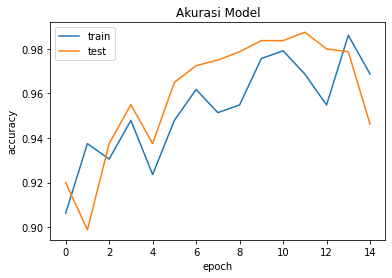

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

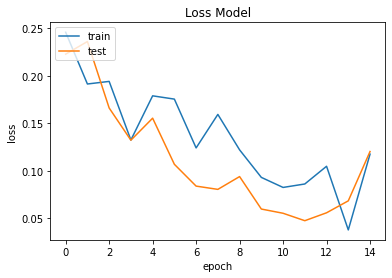

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
# memprediksi gambar
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(64, 64))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  predIdxs = np.argmax(classes, axis=1)
  
  print(fn)
  print(predIdxs)
  if classes[0][0]<0.5:
    print('Pakai Masker')
  else:
    print('Tidak Pakai Masker')

In [ ]:
# konversi model TFLiteConverter
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
# simpan model dengan format .tflite
with tf.io.gfile.GFile('masker.tflite', 'wb') as f:
  f.write(tflite_model)